In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

In [2]:
class KMeans:
    
    def __init__(self, K, init = 'kmeans++', max_iter = 100):
        self.K = K
        self.init = 'k-means++',
        self.max_iter = max_iter
        
    def fit(self, X):
        X = np.array(X)
        centroids = self._init_centroids(X)
        prev_centroids = centroids
        idx = np.zeros(X.shape[0])

        
        for i in range(self.max_iter):
            idx = self._assign_centroid(X, centroids)
            centroids = self._new_centroid(X, idx)
        self._plot_kmeans(X, centroids, idx)
        
    def _init_centroids(self, X):
        idxs = np.random.permutation(X.shape[0])
        centroids = X[idxs[:self.K]]
        #print(centroids)
        return centroids
    
    def _assign_centroid(self, X, centroids):
        # print(centroids)
        centroid_idxs = np.zeros(X.shape[0], dtype = int) 
        for i in range(X.shape[0]):
            l2_norm = []
            for j in range(centroids.shape[0]):
                l2_norm.append(np.linalg.norm(X[i] - centroids[j]))
            centroid_idxs[i] = l2_norm.index(min(l2_norm))
            
        return centroid_idxs
    
    def _new_centroid(self, X, cluster_idx):
        #print(X)
        new_centroids = np.zeros((self.K, X.shape[1]))
        
        for i in range(self.K):
            points = X[cluster_idx == i]
            new_centroids[i] = np.mean(points, axis = 0)
        
        return new_centroids
    
    def _plot_kmeans(self, X, centroids, idx):
        
        plt.figure(figsize = (8, 6))
        cmap = ListedColormap(["red", "green", "blue"])
        c = cmap(idx)
        plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=1, alpha=1)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
        plt.show()
        
        

In [3]:
iris_dataset = load_iris()
iris_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names[:])
sepal_df = iris_df.loc[:, ["sepal length (cm)", "sepal width (cm)"]]
petal_df = iris_df.loc[:, ["petal length (cm)", "petal width (cm)"]]

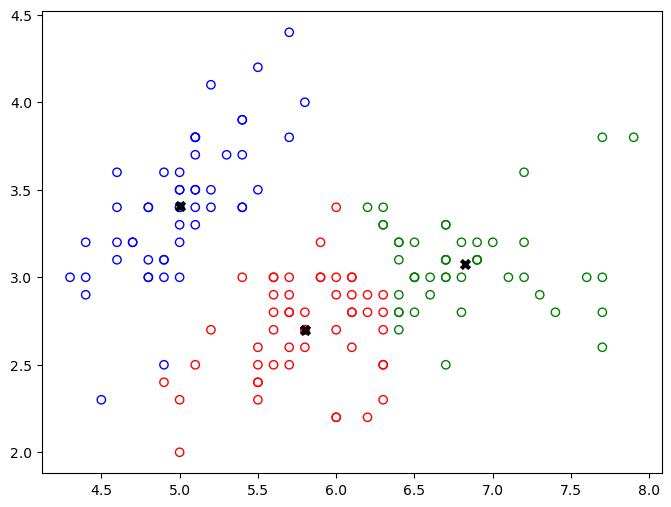

In [4]:
kmeans = KMeans(3)
kmeans.fit(sepal_df)

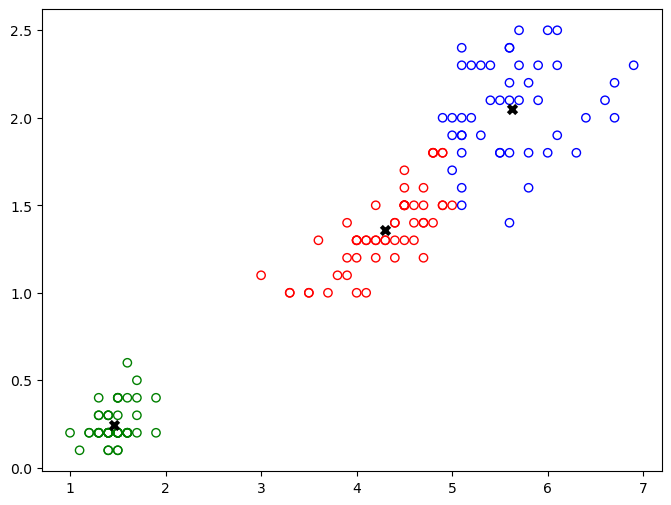

In [5]:
kmeans.fit(petal_df)